# Classification

The idea is to classify the sales according to the ranges in sales variable. Identifying as lost, low, medium and high sales. 

Load the cleaned data.

In [ ]:
import pandas as pd
df = pd.read_csv("cleaned_data.csv", encoding="ISO-8859-1")
df.head(10)

In [51]:
df_aux_3 = df.copy()
df_aux_3['sales_level'] = pd.cut(df_aux_3['sales'], bins=[df_aux_3['sales'].min()-1,0,df_aux_3['sales'].mean()/2,df_aux_3['sales'].mean(),df_aux_3['sales'].max()], labels=[1,2,3, 4])

In [52]:
#transform country column
df_aux_3['Country'] = df_aux_3['Country'].astype('category').cat.codes.astype('int32')
df_aux_3['StockCode'] = df_aux_3['StockCode'].astype('category').cat.codes.astype('int32')
df_aux_3['InvoiceNo'] = df_aux_3['InvoiceNo'].astype('category').cat.codes.astype('int32')

In [53]:
df_aux_3.drop(['sales', 'Description', 'InvoiceDate'], axis=1, inplace=True)

In [54]:
#split the dataframe: X - predictors and y - target
X = df_aux_3.drop('sales_level', axis=1)
y = df_aux_3['sales_level']

#split dataset into test/train 
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=20)

In [55]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=202)
clf.fit(X_train, y_train)
print('Score:',clf.score(X_test, y_test))
predictions = clf.predict(X_test)
df_p = pd.DataFrame()
df_p['Actual'] = y_test
df_p['Predicted'] = predictions
df_p.head()

Score: 0.9996927463559718


,Actual,Predicted
380896,2,2
64508,2,2
365434,4,4
168943,2,2
475420,2,2


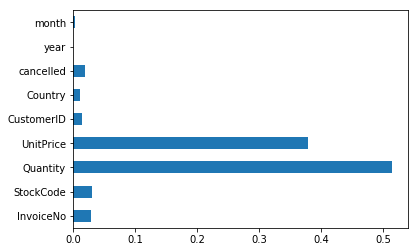

In [56]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
fig, ax = plt.subplots(1,1)
feat_importances.plot(kind='barh', ax=ax)
plt.show()